# Poisson modelling of count data: Two examples

本节需要的包：

In [1]:
require(s20x)


载入需要的程辑包：s20x

Warning message:
"程辑包's20x'是用R版本4.2.3 来建造的"


## Example 1: Earthquake frequency

古腾堡•里希特定律说，在一定时期内，预期的地震数量会随着地震的大小而成倍地减少。其公式为：

$$
\log_{10}N=a-bM
$$

where N is the expected number of earthquakes of magnitude M or more on the Richter scale. Here, a and b are unknown parameters. 其中N是里氏震级M级以上的地震的预期数量。这里，a和b是未知参数。

In [2]:
Quakes.df <- read.table("../data/EarthquakeMagnitudes.txt", header = TRUE)
Quakes.df$Locn <- as.factor(Quakes.df$Locn)
# Print first 4 SC observations
subset(Quakes.df, subset = c(Locn == "SC"))[1:4, ]
# Print first 4 WA observations
subset(Quakes.df, subset = c(Locn == "WA"))[1:4, ]


,Locn,Magnitude,Freq
,<fct>,<dbl>,<int>
1,SC,5.25,32
2,SC,5.50,27
3,SC,5.75,10
4,SC,6.00,9


,Locn,Magnitude,Freq
,<fct>,<dbl>,<int>
10,WA,5.25,13
11,WA,5.50,6
12,WA,5.75,2
13,WA,6.00,1


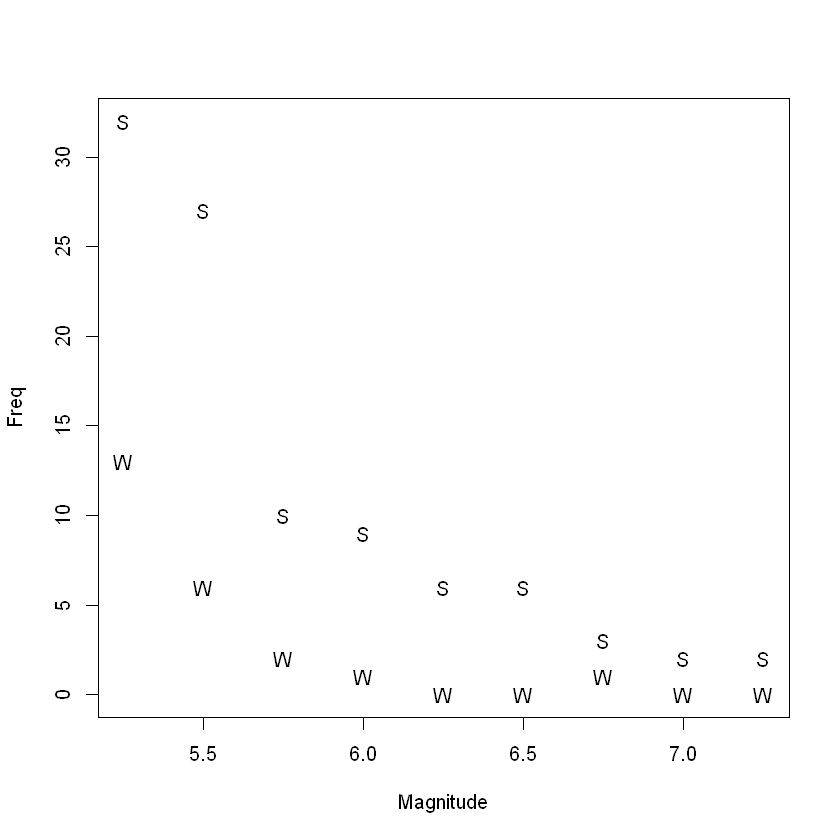

In [3]:
plot(Freq ~ Magnitude, data = Quakes.df, pch = substr(Locn, 1, 1))


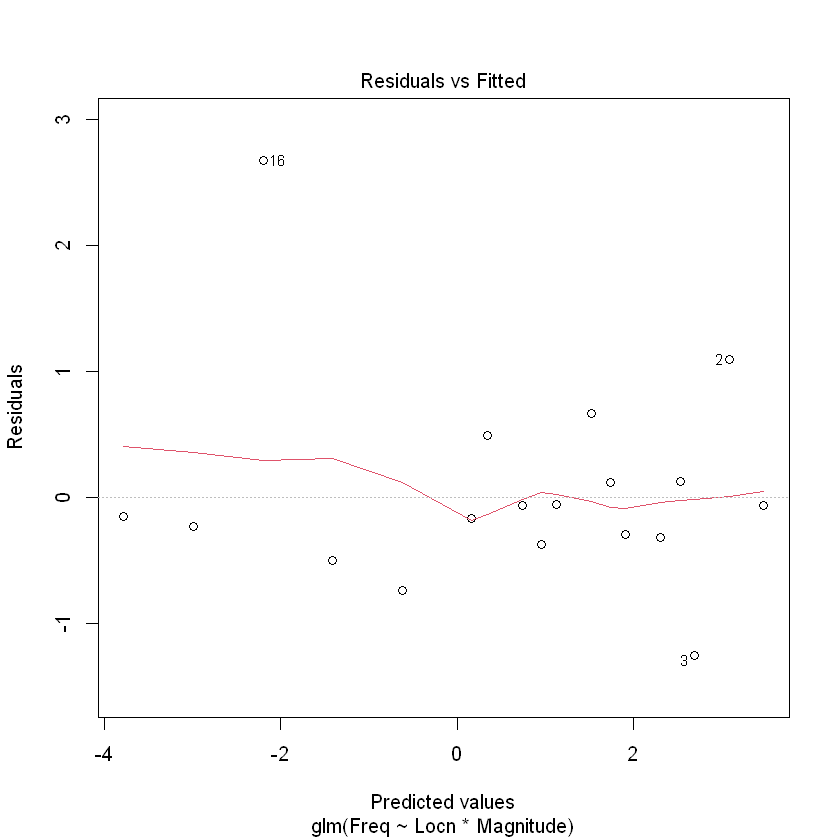

In [4]:
Quake.gfit <- glm(
    Freq ~ Locn * Magnitude,
    family = poisson,
    data = Quakes.df
)
plot(Quake.gfit, which = 1)


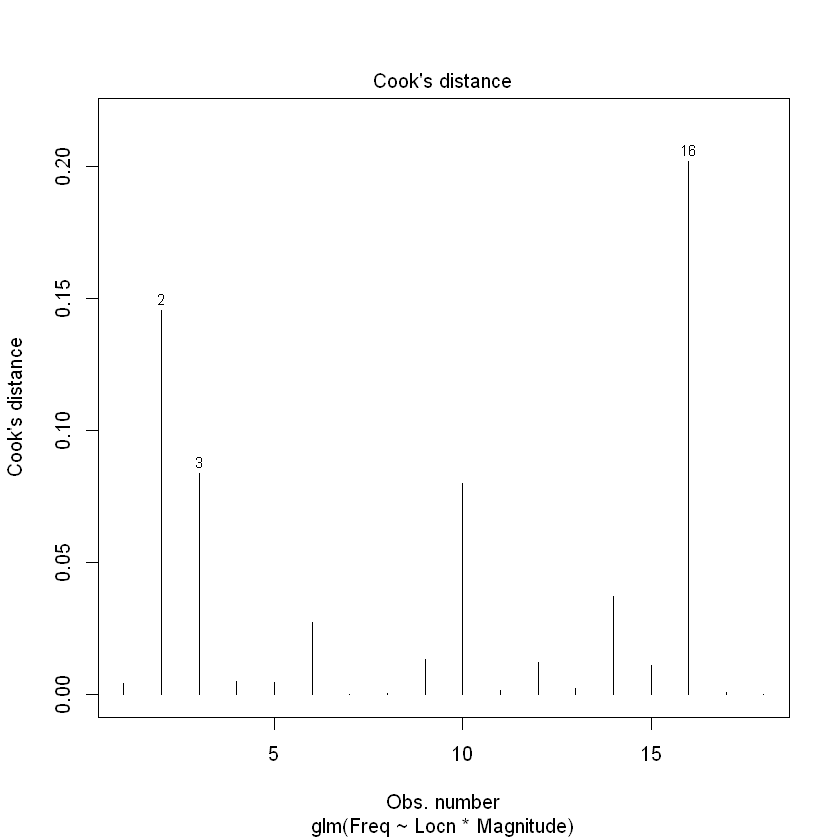

In [5]:
plot(Quake.gfit, which = 4)


In [6]:
summary(Quake.gfit)



Call:
glm(formula = Freq ~ Locn * Magnitude, family = poisson, data = Quakes.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.3261  -0.3225  -0.1172   0.1241   1.6190  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)       11.6923     1.1762   9.941  < 2e-16 ***
LocnWA             7.3923     3.9500   1.871   0.0613 .  
Magnitude         -1.5648     0.2055  -7.616 2.61e-14 ***
LocnWA:Magnitude  -1.5884     0.7199  -2.206   0.0274 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 176.1767  on 17  degrees of freedom
Residual deviance:   8.2295  on 14  degrees of freedom
AIC: 65.11

Number of Fisher Scoring iterations: 5


In [7]:
1 - pchisq(8.23, 14)


[1] 0.8770025

In [9]:
Quake.cis <- confint(Quake.gfit)
exp(Quake.cis[3, ])
## To interpret as percentage decreases
100 * (1 - exp(Quake.cis[3, ]))


Waiting for profiling to be done...



2.5 %    97.5 % 
0.1374743 0.3082437

2.5 %   97.5 % 
86.25257 69.17563

In [9]:
Quakes.df$Locn2 <- factor(Quakes.df$Locn, levels = c("WA", "SC"))

Quake2.gfit <- glm(Freq ~ Locn2 * Magnitude, family = poisson, data = Quakes.df)
(Quake.WA.ci <- exp(confint(Quake2.gfit)[3, ]))

## To interpret as percentage decreases
100 * (1 - Quake.WA.ci)


Waiting for profiling to be done...



2.5 %      97.5 % 
0.009077661 0.140175445

2.5 %   97.5 % 
99.09223 85.98246

## Example 2: Snapper counts in and around marine reserves

In [11]:
Snap.df <- read.table("../data/SnapperCROPvsHAHEI.txt", header = TRUE)
with(Snap.df, {
    Locn <- as.factor(Locn)
    Reserve <- as.factor(Reserve)
})
Snap.df


Locn,Reserve,Freq
<chr>,<chr>,<int>
Leigh,N,2
Leigh,N,1
Leigh,N,0
Leigh,Y,5
Leigh,Y,11
Leigh,Y,7
Leigh,Y,8
Leigh,Y,7
Leigh,Y,14
